
<img src="../images/starwarsstartrek.png" style="float: center; margin: 0px; height: 150px; width: 500px"> 

## SUBREDDIT CLASSIFIER

###### _Author: Afolabi Cardoso_

---

### EDA and Pre-processing

---
#### Contents:
[Overview](#Overview) | [Imports](#Imports) | [EDA](#EDA) | [Sentiment analyser](#Sentiment-analyser) | [Pre processing](#Pre-processing) | [Exports](#Exports)


---
#### Overview
In this notebook, I will be performing exploratory data analysis and pre processing on the clean dataset. I created bar charts for the top occuring words and characters. 

I also performed sentiment analysis on the both subreddits. 


---
#### Imports

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [296]:
df = pd.read_csv('../data/clean.csv')
df = df[['title','selftext','created_utc','subreddit']]

In [297]:
df.head()

,title,selftext,created_utc,subreddit
0,star wars game,,1646329318,starwars
1,if a star wars game about the famous wars in c...,,1646329234,starwars
2,what makes a star wars fan a fan,,1646329180,starwars
3,what makes a star wars fan,,1646328985,starwars
4,random clone wars thoughts,the series makes me appreciate anakin so much ...,1646328915,starwars


#### EDA

#### Top occuring words

Let's start by looking at the top occuring words in the tittle and selftext column.
To do this, I will CountVectorize.

I will use a CountVectorizer with stop_words as english and ngram_range of 1,1

In [298]:
cvec = CountVectorizer(stop_words='english', ngram_range = (1,1))

In [299]:
cvec.fit(df['title'])

CountVectorizer(stop_words='english')

In [300]:
X = cvec.transform(df['title'])

In [301]:
X.shape

(2000, 3986)

In [302]:
cvec_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

In [303]:
cvec_df.head()

,000,001,002,01,04x02,061,10,100,1000,102,...,zero,ziegfeld,zimmer,zine,ziro,zoe,zoomable,zoomers,zora,имчисм
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Top 10 occuring words
What are the 10 most common words in the corpus 

In [304]:
top_ten_starwars = cvec_df[:999].sum().sort_values(ascending=False)[:15] #top ten in starwars subreddit
top_ten_startrek = cvec_df[1000:2000].sum().sort_values(ascending=False)[:15]  #top ten in startrek subreddit
top_ten_both = cvec_df[1000:2000].sum().sort_values(ascending=False)[:15]  #top ten in both

Bar graph showing top 10 words

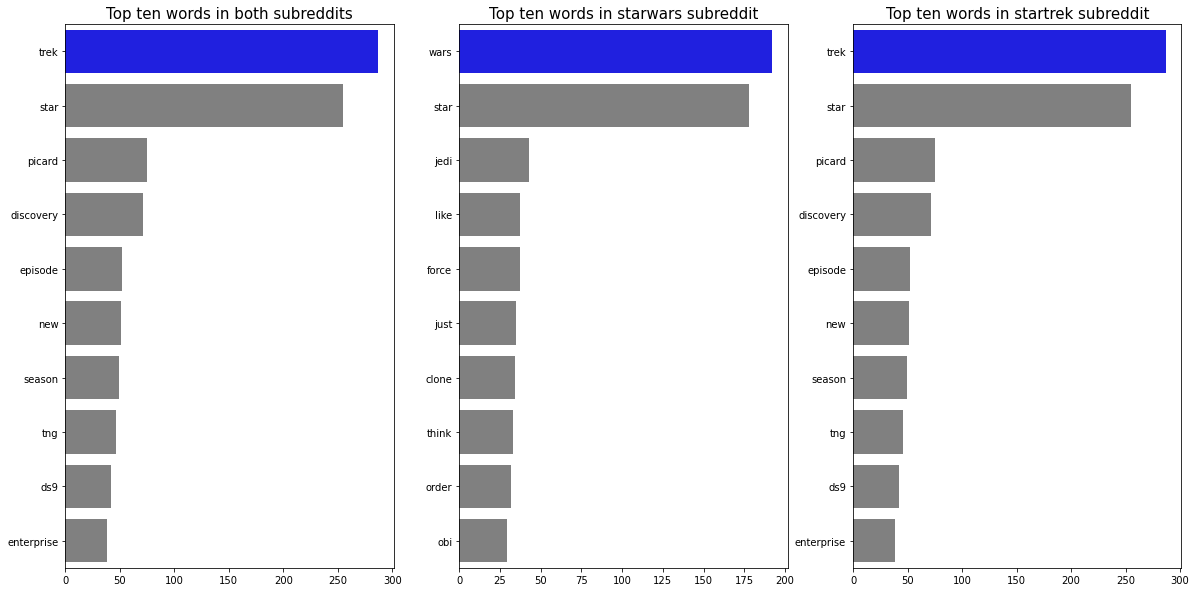

In [305]:
#create two axis 
fig ,ax = plt.subplots(1,3,figsize = (20,10))

#set color for largest bar
colr = ['grey' if (x<max(top_ten_both)) else 'blue' for x in top_ten_both]

#starwars bar chart
sns.barplot(ax = ax[0], x = top_ten_both[:10], y = top_ten_both[:10].index ,palette = colr)

#starwars bar chart
sns.barplot(ax = ax[1], x = top_ten_starwars[:10], y = top_ten_starwars[:10].index ,palette = colr)

#starwars bar chart
sns.barplot(ax = ax[2], x = top_ten_startrek[:10], y = top_ten_startrek[:10].index ,palette = colr)

#set labels

param = {'fontsize': 15,
        'fontweight': 2,
        }

ax[0].set_title('Top ten words in both subreddits', fontdict = param)
ax[1].set_title('Top ten words in starwars subreddit', fontdict = param)
ax[2].set_title('Top ten words in startrek subreddit', fontdict = param);

#### Most popular characters

I created a list of the top characters in both starwars and startrek. I will use that list to find the most talked about characters in the subreddits

In [306]:
characters = [ 'vader','anakin','skywalker', 'ahsoka', 'solo','leia','yoda','obi','kenobi',
              'palpatime','rey','chewbecca','r2d2','kylo','boba','maul','mace','dooku','padme',
              'grogu','jabba','finn','grievous','snoke','mandalorian','gerrera','rex','ventress','bb8','bane',
              'spock','kirk','picard','worf','nyota','mccoy','seven','scotty','sisko','data','hikaru','riker','dax',
              'troi','kathryn','miles','kira','forge','crusher','odo','tuvok','q',
              'guinan','burnham','saru','tilly','voq','ash','stamets','lorca','culber','pike','booker','adira','reno'
             ]


In [307]:
def character_check(string):
    lst = string.lower().split(" ")
    for char in lst:
        if char in characters:
            return char


In [308]:
df_starwars = df[df['subreddit'] == 'starwars']
df_startrek = df[df['subreddit'] == 'startrek']

In [309]:
# Top characters in both subreddits
top_char_sw = df_starwars['title'].map(character_check).value_counts()
top_char_st = df_startrek['title'].map(character_check).value_counts()

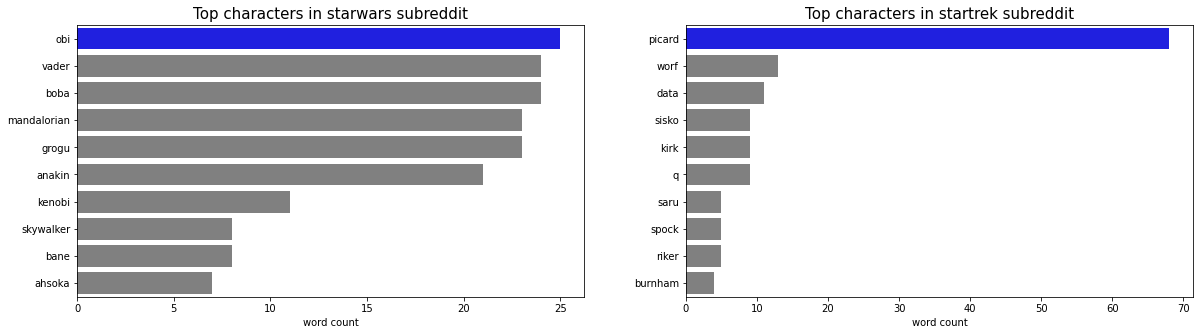

In [310]:

#create two axis 
fig ,ax = plt.subplots(1,2,figsize = (20,5))

#set color for largest bar
colr = ['grey' if (x<max(top_char_st)) else 'blue' for x in top_char_st]
colr = ['grey' if (x<max(top_char_sw)) else 'blue' for x in top_char_sw]


#starwars bar chart
sns.barplot(ax = ax[0], x = top_char_sw[:10], y = top_char_sw[:10].index ,palette = colr)

#startrek bar chart
sns.barplot(ax = ax[1], x = top_char_st[:10], y = top_char_st[:10].index ,palette = colr)

param = {'fontsize': 15,
        'fontweight': 2,
        }

#set labels
ax[0].set(xlabel = 'word count')
ax[1].set(xlabel = 'word count')
ax[0].set_title('Top characters in starwars subreddit', fontdict=param)
ax[1].set_title('Top characters in startrek subreddit', fontdict=param);

#### Sentiment analyser

Sentiment analysis is a method by which we try to determine the polarity of a statment. In this case, we will use sentiment analysis to compare the two subreddits. I am curious to see which group of fans have more positive sentiments.

From the VADAR NLTK library, I will use the SentimentIntensityAnalyzer() method. This method takes in a string and returns a dictionary containing, a positive, neutral, negative and compound value. We will be using the compound score to perform our analysis.

In [311]:
#Instantiate the analyser
sia = SentimentIntensityAnalyzer()

In [312]:
#create a new column for the mood
df['mood'] = df['title'].map(lambda x: sia.polarity_scores(x)['compound'])

Let's plot the distribution of the mood for both 

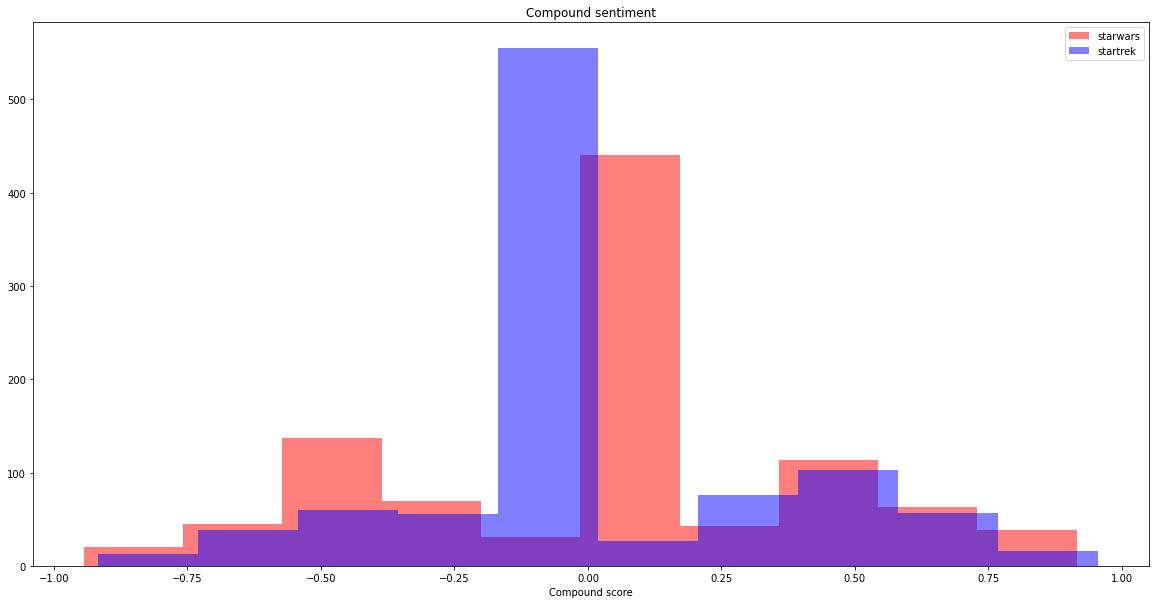

In [314]:
plt.figure(figsize=(20,10))
plt.hist(df[df['subreddit'] == 'starwars']['mood'],color='red', alpha=.5, label = 'starwars')
plt.hist(df[df['subreddit'] == 'startrek']['mood'],color='blue', alpha=.5, label = 'startrek')
plt.title('Compound sentiment')
plt.xlabel('Compound score')
plt.legend();

In [261]:
df.groupby('subreddit').mean()['mood']

subreddit
startrek    0.049556
starwars   -0.009407
Name: mood, dtype: float64

They both have sentiments close to neutral. However, starwars has a slightly more negative sentiment score overall as compared to startrek. I believe this negative sentiment score can be attributed to certain negative words or phrases i.e wars and battle.

#### Pre processing

#### Remove common words

The chart above shows that the word star occures very frequently in both subreddits. I will remove it to prevent it from negatively affecting the model 

In [262]:
def  remove_words(str):
    words = ['star']
    result = []
    for word in str.split(' '):
        if word.lower() not in words:
            result.append(word)
    return ' '.join(result)

df['title'] = df['title'].map(remove_words)

In [263]:
df['title']

0                                               wars game
1          if a wars game about the famous wars in comics
2                          what makes a wars fan   a fan 
3                                  what makes a wars fan 
4                              random clone wars thoughts
                              ...                        
1995      i have finally watched ds9 from start to finish
1996                                           tos script
1997    how did you get into trek  what series was you...
1998    if you ve never seen this  this is the prototy...
1999    the ready room   all in   sonequa martin green...
Name: title, Length: 2000, dtype: object

I will binarize the target variable. I will set the value startrek to 0 and starwars to 1

In [264]:
df['subreddit'] = df['subreddit'].map({'startrek':0,
                                      'starwars':1} )

In [265]:
df['title'].isna().sum()

0

## Exports

Export the cleaned dataframe as clean.csv

In [266]:
df.to_csv('../data/preprocessed.csv', index=False)